<a href="https://colab.research.google.com/github/warriorgithub/COVID19-Global-Forecasting/blob/master/COVID19_Global_Forecasting_(Week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid19/covid19-global-forecasting-week-1/train.csv')

In [0]:
train_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


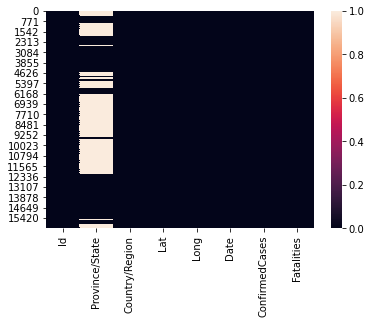

In [0]:
sns.heatmap(train_df.isnull())

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 8 columns):
Id                16188 non-null int64
Province/State    7410 non-null object
Country/Region    16188 non-null object
Lat               16188 non-null float64
Long              16188 non-null float64
Date              16188 non-null object
ConfirmedCases    16188 non-null float64
Fatalities        16188 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1011.9+ KB


In [0]:
def fillNullProvince(x):
  coordinates = (x['Lat'],x['Long'])
  result =  rg.search(coordinates)
  return result[0].get('name')

In [0]:
train_df['Province/State'] = train_df.apply(lambda x:fillNullProvince(x) if pd.isnull(x['Province/State']) else x['Province/State'] ,axis=1)
train_df['Province/State'].value_counts()

Loading formatted geocoded file...


Grand Princess      114
Diamond Princess    114
Mweka               114
US                   57
Maryland             57
                   ... 
Villa Altagracia     57
Al                   57
Chisec               57
Ogre                 57
Ontario              57
Name: Province/State, Length: 281, dtype: int64

In [0]:
train_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Kajran,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Kajran,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Kajran,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Kajran,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,Kajran,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [0]:
import geopandas as gp

In [0]:
train_df.to_csv('covid19master.csv', index=False)

In [0]:
master_df = train_df = pd.read_csv('/content/covid19master.csv')

In [22]:
master_df.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Kajran,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Kajran,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Kajran,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Kajran,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,Kajran,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [41]:
master_df[master_df['Country/Region']=='Afghanistan'].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Kajran,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Kajran,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Kajran,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Kajran,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,Kajran,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [0]:
confirmed_cases_by_country = master_df.groupby('Country/Region').sum()[['ConfirmedCases','Fatalities']]
confirmed_cases_by_country.sort_values(by=['ConfirmedCases','Fatalities'],ascending=False,inplace=True)

In [127]:
confirmed_cases_by_country.head(10)

,ConfirmedCases,Fatalities
Country/Region,,
China,3124622.0,103112.0
Italy,238049.0,16221.0
Iran,150833.0,7166.0
"Korea, South",137889.0,1048.0
Spain,64917.0,2325.0
Germany,53847.0,106.0
France,48132.0,930.0
US,31858.0,579.0
Cruise Ship,22668.0,151.0


In [0]:
confirmed_cases_by_country['Country'] = confirmed_cases_by_country.index

<function matplotlib.pyplot.show>

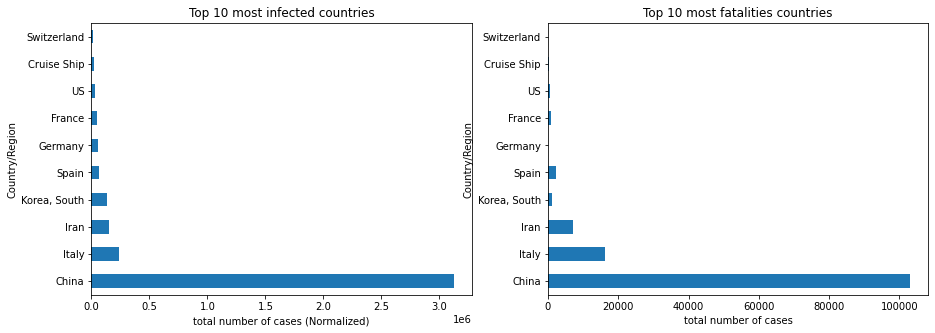

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
confirmed_cases_by_country['ConfirmedCases'].head(10).plot(kind='barh')
plt.xlabel('total number of cases (Normalized)')
plt.title('Top 10 most infected countries')
plt.subplot(1,2,2)
confirmed_cases_by_country['Fatalities'].head(10).plot(kind='barh')
plt.xlabel('total number of cases')
plt.title('Top 10 most fatalities countries')
plt.show

In [136]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource
from bokeh.models import HoverTool
import json
#Input GeoJSON source that contains features for plotting.
merged_json = json.loads(master_df.to_json())
json_data = json.dumps(merged_json)
#print(json_data)
geosource = GeoJSONDataSource(geojson = json_data)
#pointsource = ColumnDataSource(points)
#Create figure object.
p = figure(title = 'Worldwide spread of Coronavirus', plot_height = 600 , plot_width = 1050)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
patch=p.patches(xs='xs',ys='ys', source = geosource,fill_color = '#fff7bc',
          line_color = 'black', line_width = 0.35, fill_alpha = 1, 
                hover_fill_color="#fec44f")
p.add_tools(HoverTool(tooltips=[('Country','@country'),('ConfirmedCases','@confirmedcases'), ('Fatalities','@fatalities')], renderers=[patch]))

#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)